In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_FraudDetection_JAR2020.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

In [4]:

columns_to_check = [col for col in df.columns if col != 'p_aaer']

# Drop rows with NaN values in the selected columns
df_cleaned = df.dropna(subset=columns_to_check)


In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126483 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        126483 non-null  int64  
 1   gvkey        126483 non-null  int64  
 2   p_aaer       909 non-null     float64
 3   misstate     126483 non-null  int64  
 4   act          126483 non-null  float64
 5   ap           126483 non-null  float64
 6   at           126483 non-null  float64
 7   ceq          126483 non-null  float64
 8   che          126483 non-null  float64
 9   cogs         126483 non-null  float64
 10  csho         126483 non-null  float64
 11  dlc          126483 non-null  float64
 12  dltis        126483 non-null  float64
 13  dltt         126483 non-null  float64
 14  dp           126483 non-null  float64
 15  ib           126483 non-null  float64
 16  invt         126483 non-null  float64
 17  ivao         126483 non-null  float64
 18  ivst         126483 non-null 

In [6]:
print("Count of misstate = 1:", (df_cleaned['misstate'] == 1).sum())
print("Count of misstate = 0:", (df_cleaned['misstate'] == 0).sum())

Count of misstate = 1: 909
Count of misstate = 0: 125574


In [7]:
df_cleaned.to_csv("data_FraudDetection_Cleaned.csv", index=False)

In [8]:
from imblearn.over_sampling import SMOTE

# Selecting only numerical features for synthetic data generation
features = [col for col in df_cleaned.columns if col not in ['fyear', 'gvkey', 'p_aaer']]
X = df_cleaned[features]
y = df_cleaned['misstate']  # If you have a target column

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Identify newly added samples
num_new_samples = len(X_smote) - len(X)  # The number of synthetic samples

# Convert back to DataFrame
df_smote = pd.DataFrame(X_smote, columns=features)
df_smote['misstate'] = y_smote  # Restore target

# Assign fyear and gvkey randomly from the original dataset
df_smote['fyear'] = df_cleaned['fyear'].sample(len(df_smote), replace=True).values
df_smote['gvkey'] = df_cleaned['gvkey'].sample(len(df_smote), replace=True).values

# Retain original p_aaer values, set new ones to NaN
df_smote['p_aaer'] = pd.concat([
    df_cleaned['p_aaer'], 
    pd.Series([None] * num_new_samples, index=range(len(df_cleaned), len(df_smote)))
], ignore_index=True)

desired_order = [
    "fyear", "gvkey", "p_aaer", "misstate", "act", "ap", "at", "ceq", "che", "cogs", 
    "csho", "dlc", "dltis", "dltt", "dp", "ib", "invt", "ivao", "ivst", "lct", "lt", "ni", 
    "ppegt", "pstk", "re", "rect", "sale", "sstk", "txp", "txt", "xint", "prcc_f", "dch_wc", 
    "ch_rsst", "dch_rec", "dch_inv", "soft_assets", "ch_cs", "ch_cm", "ch_roa", "issue", 
    "bm", "dpi", "reoa", "EBIT", "ch_fcf"
]

df_smote = df_smote[desired_order]  # Reorder DataFrame columns


df_smote.to_csv("data_FraudDetection_smote.csv", index=False)


In [9]:
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251148 entries, 0 to 251147
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        251148 non-null  int64  
 1   gvkey        251148 non-null  int64  
 2   p_aaer       909 non-null     object 
 3   misstate     251148 non-null  int64  
 4   act          251148 non-null  float64
 5   ap           251148 non-null  float64
 6   at           251148 non-null  float64
 7   ceq          251148 non-null  float64
 8   che          251148 non-null  float64
 9   cogs         251148 non-null  float64
 10  csho         251148 non-null  float64
 11  dlc          251148 non-null  float64
 12  dltis        251148 non-null  float64
 13  dltt         251148 non-null  float64
 14  dp           251148 non-null  float64
 15  ib           251148 non-null  float64
 16  invt         251148 non-null  float64
 17  ivao         251148 non-null  float64
 18  ivst         251148 non-

In [10]:
print("Count of misstate = 1:", (df_smote['misstate'] == 1).sum())
print("Count of misstate = 0:", (df_smote['misstate'] == 0).sum())


Count of misstate = 1: 125574
Count of misstate = 0: 125574


In [11]:
from imblearn.over_sampling import ADASYN

# Selecting only numerical features for synthetic data generation
features = [col for col in df_cleaned.columns if col not in ['fyear', 'gvkey', 'p_aaer']]
X = df_cleaned[features]
y = df_cleaned['misstate']  # If you have a target column

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Identify newly added samples
num_new_samples = len(X_adasyn) - len(X)  # The number of synthetic samples

# Convert back to DataFrame
df_adasyn = pd.DataFrame(X_adasyn, columns=features)
df_adasyn['misstate'] = y_adasyn  # Restore target

# Assign fyear and gvkey randomly from the original dataset
df_adasyn['fyear'] = df_cleaned['fyear'].sample(len(df_adasyn), replace=True).values
df_adasyn['gvkey'] = df_cleaned['gvkey'].sample(len(df_adasyn), replace=True).values

# Retain original p_aaer values, set new ones to NaN
df_adasyn['p_aaer'] = pd.concat([
    df_cleaned['p_aaer'], 
    pd.Series([None] * num_new_samples, index=range(len(df_cleaned), len(df_adasyn)))
], ignore_index=True)

# Reorder DataFrame columns
desired_order = [
    "fyear", "gvkey", "p_aaer", "misstate", "act", "ap", "at", "ceq", "che", "cogs", 
    "csho", "dlc", "dltis", "dltt", "dp", "ib", "invt", "ivao", "ivst", "lct", "lt", "ni", 
    "ppegt", "pstk", "re", "rect", "sale", "sstk", "txp", "txt", "xint", "prcc_f", "dch_wc", 
    "ch_rsst", "dch_rec", "dch_inv", "soft_assets", "ch_cs", "ch_cm", "ch_roa", "issue", 
    "bm", "dpi", "reoa", "EBIT", "ch_fcf"
]

df_adasyn = df_adasyn[desired_order]  

# Save the new dataset
df_adasyn.to_csv("data_FraudDetection_adasyn.csv", index=False)


In [12]:
df_adasyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251367 entries, 0 to 251366
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        251367 non-null  int64  
 1   gvkey        251367 non-null  int64  
 2   p_aaer       909 non-null     object 
 3   misstate     251367 non-null  int64  
 4   act          251367 non-null  float64
 5   ap           251367 non-null  float64
 6   at           251367 non-null  float64
 7   ceq          251367 non-null  float64
 8   che          251367 non-null  float64
 9   cogs         251367 non-null  float64
 10  csho         251367 non-null  float64
 11  dlc          251367 non-null  float64
 12  dltis        251367 non-null  float64
 13  dltt         251367 non-null  float64
 14  dp           251367 non-null  float64
 15  ib           251367 non-null  float64
 16  invt         251367 non-null  float64
 17  ivao         251367 non-null  float64
 18  ivst         251367 non-

In [13]:
print("Count of misstate = 1:", (df_adasyn['misstate'] == 1).sum())
print("Count of misstate = 0:", (df_adasyn['misstate'] == 0).sum())

Count of misstate = 1: 125793
Count of misstate = 0: 125574


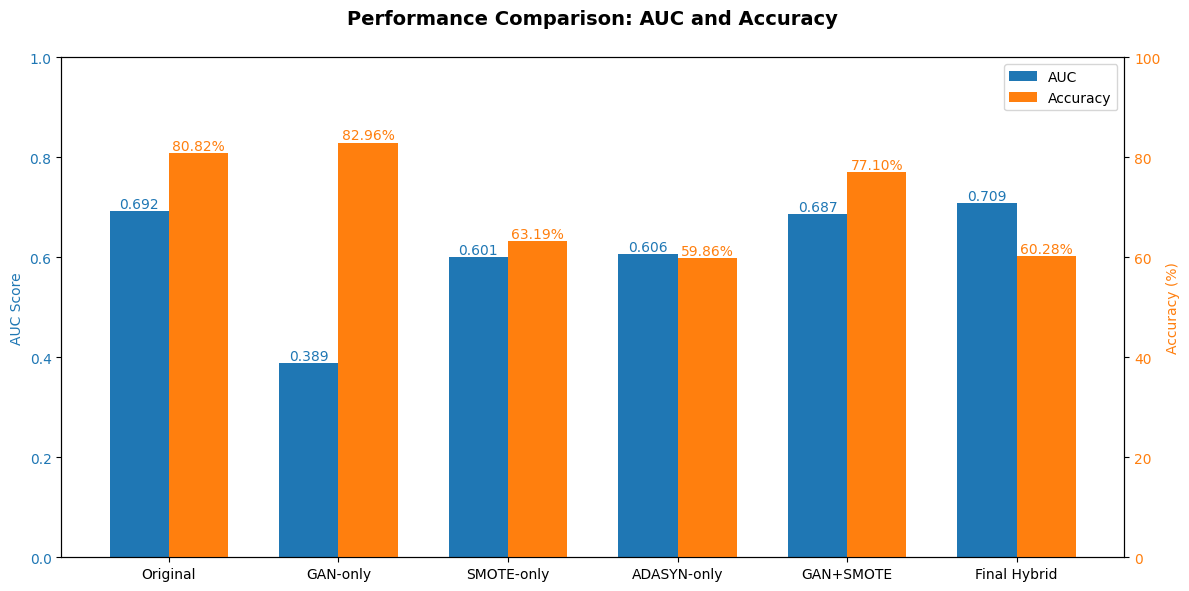

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
approaches = ['Original', 'GAN-only', 'SMOTE-only', 'ADASYN-only', 'GAN+SMOTE', 'Final Hybrid']
auc = [0.692, 0.389, 0.601, 0.606, 0.687, 0.709]
accuracy = [80.82, 82.96, 63.19, 59.86, 77.10, 60.28]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set positions for bars
x = np.arange(len(approaches))
width = 0.35

# Plot AUC on primary axis
bars1 = ax1.bar(x - width/2, auc, width, color='#1f77b4', label='AUC')
ax1.set_ylabel('AUC Score', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.set_ylim(0, 1.0)

# Add AUC values on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', color='#1f77b4')

# Create secondary axis for Accuracy
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, accuracy, width, color='#ff7f0e', label='Accuracy')
ax2.set_ylabel('Accuracy (%)', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.set_ylim(0, 100)

# Add Accuracy values on top of bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', color='#ff7f0e')

# Set x-axis labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(approaches)
plt.title('Performance Comparison: AUC and Accuracy', y=1.05, fontsize=14, fontweight='bold')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('auc_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()